In [174]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data and Exploring

In [172]:
train = pd.read_csv("./train.csv")
store = pd.read_csv("./store.csv")

C:\Users\grott\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [173]:
train.head(10)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,a,1.0
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,0.0,a,1.0
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,0.0,a,1.0
3,2013-01-01,377.0,2.0,0.0,0.0,0.0,0.0,a,1.0
4,2013-01-01,376.0,2.0,0.0,0.0,0.0,0.0,a,1.0
5,2013-01-01,375.0,2.0,0.0,0.0,0.0,0.0,a,1.0
6,2013-01-01,374.0,2.0,0.0,0.0,0.0,0.0,a,1.0
7,2013-01-01,373.0,2.0,0.0,0.0,0.0,0.0,a,1.0
8,2013-01-01,372.0,2.0,0.0,0.0,0.0,NaN,a,1.0
9,2013-01-01,371.0,2.0,0.0,0.0,0.0,0.0,a,1.0


In [175]:
# Check missing values in train
train.isnull().sum() / train.shape[0]

Date             0.000000
Store            0.030263
DayOfWeek        0.029818
Sales            0.029833
Customers        0.029934
Open             0.030083
Promo            0.030095
StateHoliday     0.030189
SchoolHoliday    0.030320
dtype: float64

In [176]:
store.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [177]:
# Remove stores with no IDs since predictions will be based on stores
train.dropna(axis=0, inplace=True, subset=["Store"])

In [178]:
# Check for missing values in stores table
store.isnull().sum() / store.shape[0]

Store                        0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002691
CompetitionOpenSinceMonth    0.317489
CompetitionOpenSinceYear     0.317489
Promo2                       0.000000
Promo2SinceWeek              0.487892
Promo2SinceYear              0.487892
PromoInterval                0.487892
dtype: float64

In [179]:
# Joining datasets together
dataset = train.join(store.set_index("Store"), on="Store")
dataset.head(10)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,a,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,0.0,a,1.0,d,a,6630.0,NaN,NaN,0,NaN,NaN,NaN
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,0.0,a,1.0,a,c,2140.0,8.0,2012.0,0,NaN,NaN,NaN
3,2013-01-01,377.0,2.0,0.0,0.0,0.0,0.0,a,1.0,a,c,100.0,6.0,2010.0,1,18.0,2010.0,"Feb,May,Aug,Nov"
4,2013-01-01,376.0,2.0,0.0,0.0,0.0,0.0,a,1.0,a,a,160.0,8.0,2012.0,0,NaN,NaN,NaN
5,2013-01-01,375.0,2.0,0.0,0.0,0.0,0.0,a,1.0,a,c,15710.0,2.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
6,2013-01-01,374.0,2.0,0.0,0.0,0.0,0.0,a,1.0,a,a,1150.0,9.0,2007.0,0,NaN,NaN,NaN
7,2013-01-01,373.0,2.0,0.0,0.0,0.0,0.0,a,1.0,d,c,11120.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
8,2013-01-01,372.0,2.0,0.0,0.0,0.0,NaN,a,1.0,d,c,4880.0,8.0,2010.0,1,18.0,2014.0,"Jan,Apr,Jul,Oct"
9,2013-01-01,371.0,2.0,0.0,0.0,0.0,0.0,a,1.0,d,c,1970.0,7.0,2009.0,1,45.0,2014.0,"Feb,May,Aug,Nov"


In [180]:
# Checking Data Types
dataset.dtypes

Date                          object
Store                        float64
DayOfWeek                    float64
Sales                        float64
Customers                    float64
Open                         float64
Promo                        float64
StateHoliday                  object
SchoolHoliday                float64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [183]:
# Inspecting nulls after joining
dataset.isnull().sum() / dataset.shape[0]

Date                         0.000000
Store                        0.000000
DayOfWeek                    0.029890
Sales                        0.029268
Customers                    0.029487
Open                         0.030024
Promo                        0.030144
StateHoliday                 0.030313
SchoolHoliday                0.030472
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.000000
CompetitionOpenSinceMonth    0.000000
CompetitionOpenSinceYear     0.000000
Promo2                       0.000000
Promo2SinceWeek              0.000000
Promo2SinceYear              0.000000
PromoInterval                0.000000
dtype: float64

In [182]:
# Removing rows with many nulls
dataset.dropna(axis=0, inplace=True, subset=["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"])

In [184]:
# Checking other NAs and what to do
dataset["DayOfWeek"].unique()

# DayofWeek has nans nas could be filled throug date column --> easier could be derived from it and original dropped --> DONE
# Open fill nas through date if ir is not a Sunday
# Sales Impute
# Customers can be imputed (but clarify if we need it)
# Promo replace NAs with "no promotion"
# StateHoliday data has different data types for same values
# SchoolHoliday can be filled based on actual but could be dropped since likely irrelevant


array([ 2., nan,  3.,  4.,  5.,  6.,  7.,  1.])

In [185]:
# Replacing DayOfWeek with the correct number
dataset = dataset.astype({"Date": "datetime64[ns]"})
dataset["DayOfWeek"] = dataset["Date"].dt.weekday

# Checking what weekdays are there when NAs for Open
dataset[dataset["Open"].isnull()]["DayOfWeek"].unique()

# Put correct data types
#dataset = dataset.astype({"Date": "datetime64[ns]", "Store": int, "Customers": int})

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

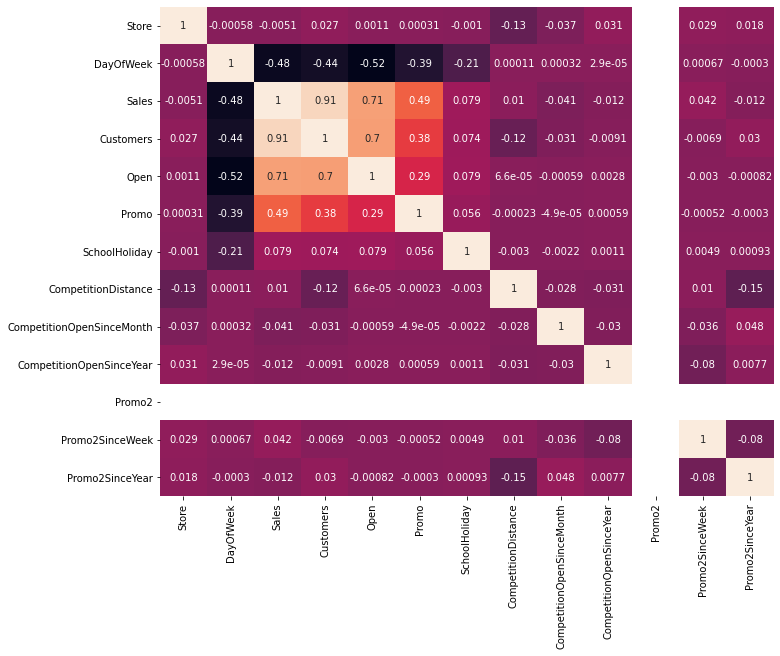

In [186]:
# Check correlations
plt.subplots(figsize=(11,9))
sns.heatmap(dataset.corr(), cbar=False, annot=True)

## Encoding

In [167]:
# Target Encoding for Store
ce_te = ce.TargetEncoder(cols=["Store"])

# Setting on customers first
ce_te.fit(dataset["Store"], dataset["Customers"])
dataset["Store_tgt_enc"] = ce_te.transform(dataset["Store"])

# Below code not applied because FE did not yield high correlation to target after all

# Frequency Encoding
# ce_fe = dataset.groupby("Store").size()
# ce_fe = ce_fe / len(dataset)
# dataset["Store_frq_enc"] = dataset["Store"].map(ce_fe)

# dataset.drop(axis=1, labels=["Store_frq_enc"], inplace=True)



## Test / Train Split